# Exploritory Data Analysis

## Importing Training Data

---
I'm going to go over the missing values and transformations in this ipython notebook. I will then implement the changes in a train_model.py file.



In [1]:
import pandas as pd
import numpy as np
train = pd.read_csv('./train.csv', index_col='PassengerId')
test = pd.read_csv('./test.csv', index_col='PassengerId')
df = pd.concat([train, test], keys=['train', 'test'], sort=True)
df.head()

Age Cabin Embarked     Fare  \
      PassengerId                                 
train 1            22.0   NaN        S   7.2500   
      2            38.0   C85        C  71.2833   
      3            26.0   NaN        S   7.9250   
      4            35.0  C123        S  53.1000   
      5            35.0   NaN        S   8.0500   

                                                                Name  Parch  \
      PassengerId                                                             
train 1                                      Braund, Mr. Owen Harris      0   
      2            Cumings, Mrs. John Bradley (Florence Briggs Th...      0   
      3                                       Heikkinen, Miss. Laina      0   
      4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)      0   
      5                                     Allen, Mr. William Henry      0   

                   Pclass     Sex  SibSp  Survived            Ticket  
      PassengerId                                                     
train 1                 3    male      1       0.0         A/5 21171  
      2                 1  female      1       1.0          PC 17599  
      3                 3  female      0       1.0  STON/O2. 3101282  
      4                 1  female      1       1.0            113803  
      5                 3    male      0       0.0            373450

This is the original dataset.

In [2]:
df.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1309 entries, (train, 1) to (test, 1309)
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
Ticket      1309 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 126.6+ KB


In [4]:
print('Training Set: \n\n', train.isnull().sum(), '\n\n Testing Set: \n\n', test.isnull().sum())


Training Set: 

 Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64 

 Testing Set: 

 Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64


There are quite a few missing values, some we will inpute, and some we will ignore.

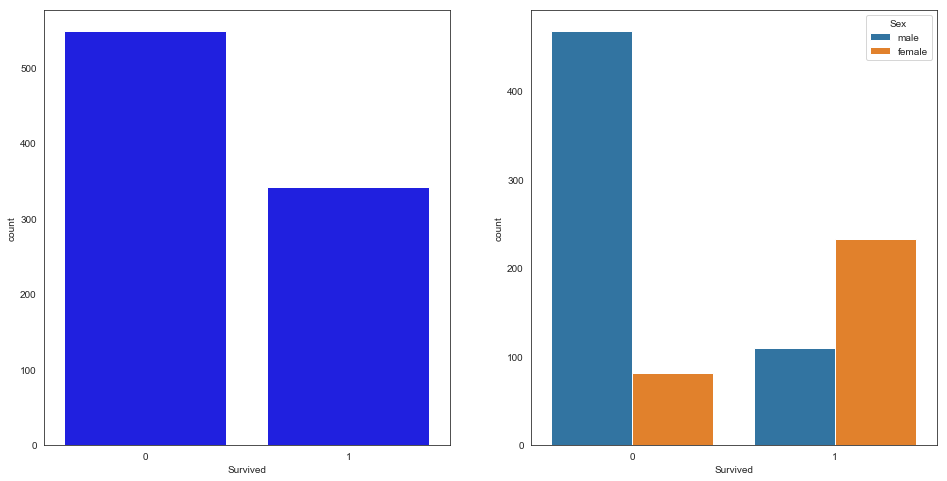

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set_style('white')
f,ax=plt.subplots(1,2,figsize=(16,8))
sns.countplot('Survived', data=train, color='b', ax=ax[0])
sns.countplot('Survived',data=train, hue='Sex', ax=ax[1]);

Unfortunetly most people died, however your were more likely to survive as a women. 

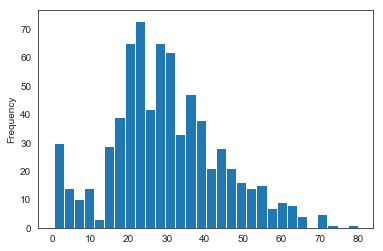

In [6]:
train.Age.dropna().plot.hist(bins=30);

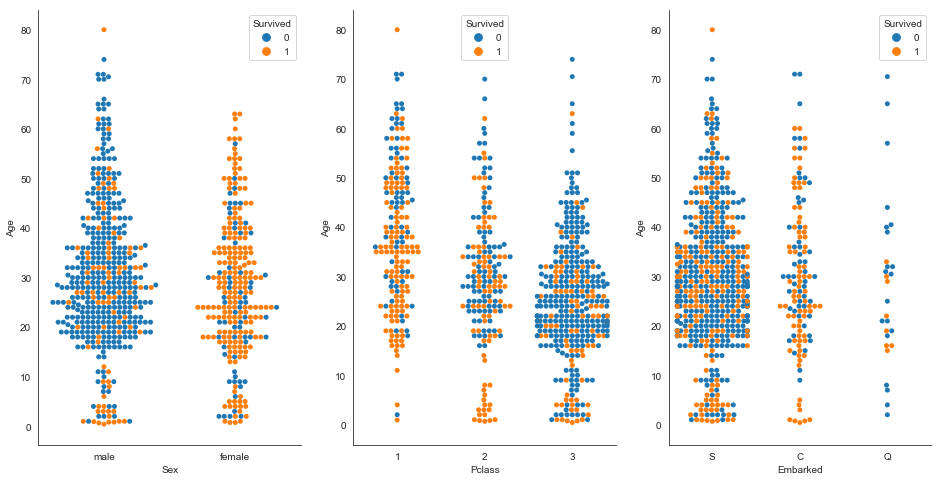

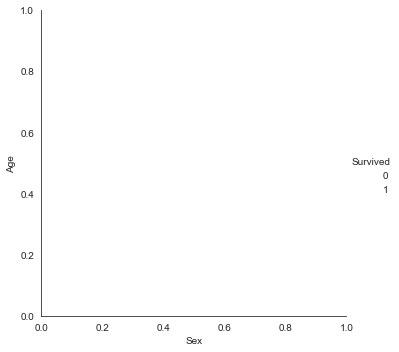

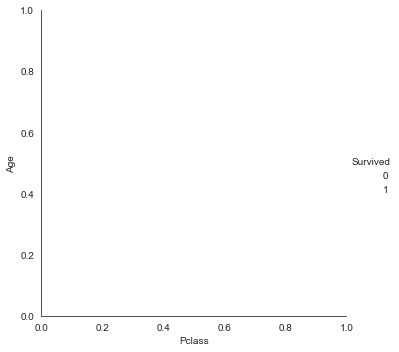

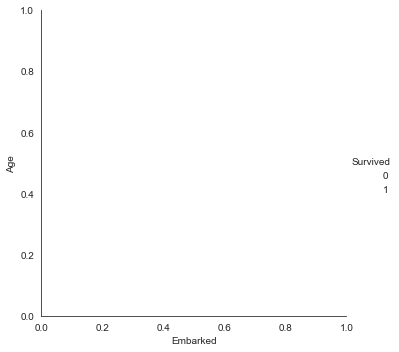

In [22]:
fig, ax = plt.subplots(1, 3,figsize=(16,8))
# fig, ax = plt.subplots(2, 3,figsize=(16,8))

sns.despine()
sns.catplot(x="Sex", y="Age", kind="swarm", hue='Survived',  data=train, ax=ax[0])
sns.catplot(x="Pclass", y="Age", kind="swarm", hue='Survived',  data=train, ax=ax[1])
sns.catplot(x="Embarked", y="Age", kind="swarm", hue='Survived',  data=train, ax=ax[2])

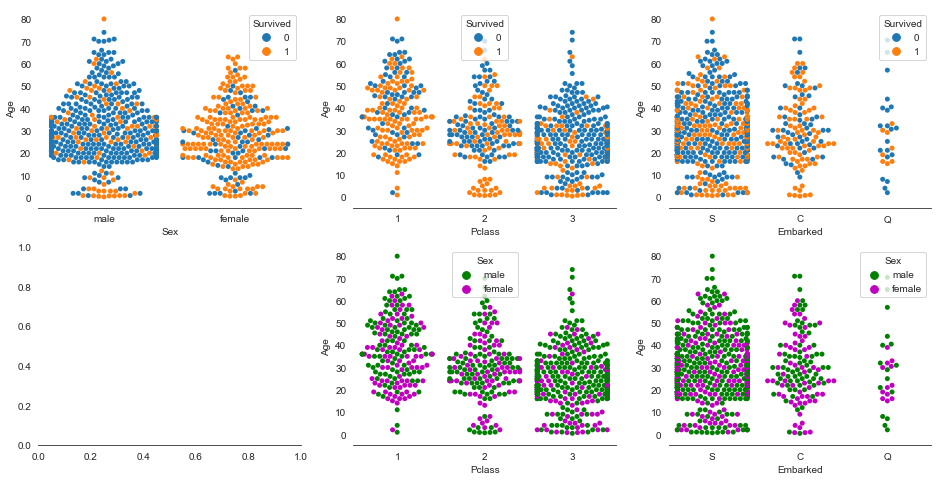

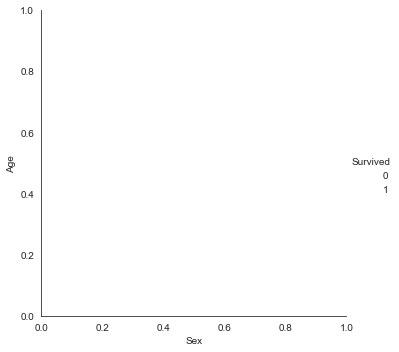

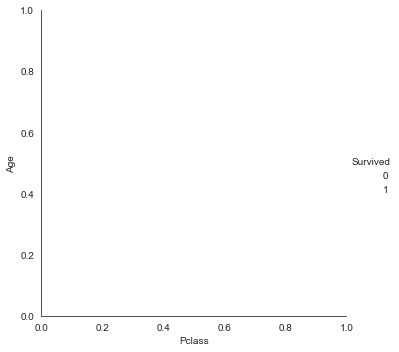

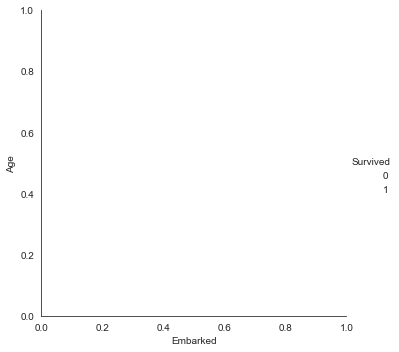

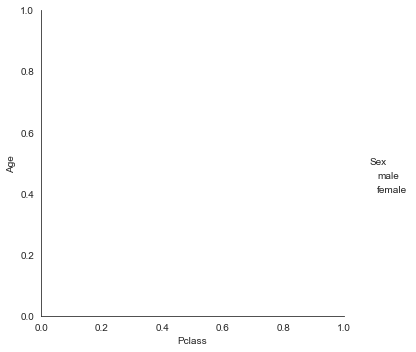

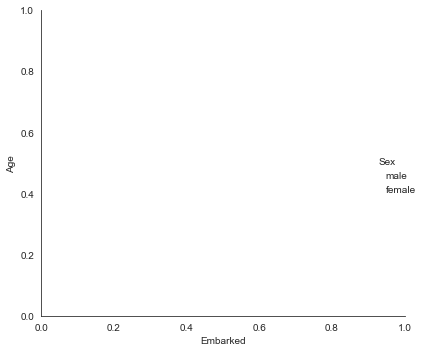

In [19]:
sns.catplot(x="Pclass", y="Age", kind="swarm", hue='Sex', 
            data=train,palette={"male": "g", "female": "m"}, ax=ax[1,1])
sns.catplot(x="Embarked", y="Age", kind="swarm", hue='Sex', 
            data=train, palette={"male": "g", "female": "m"}, ax=ax[1,2]);

plt.tight_layout()

/Applications/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


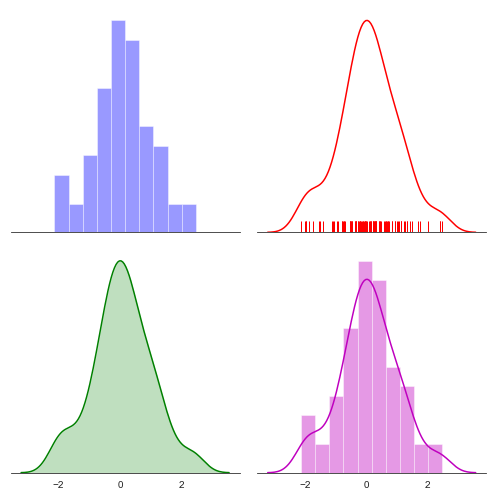

In [16]:
import numpy as np
rs = np.random.RandomState(10)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)

# Generate a random univariate dataset
d = rs.normal(size=100)

# Plot a simple histogram with binsize determined automatically
sns.distplot(d, kde=False, color="b", ax=axes[0, 0])

# Plot a kernel density estimate and rug plot
sns.distplot(d, hist=False, rug=True, color="r", ax=axes[0, 1])

# Plot a filled kernel density estimate
sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])

# Plot a historgram and kernel density estimate
sns.distplot(d, color="m", ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

We can see it is better to be female, regardless of age, although the effects are diminished for those passengers under 10. It is also demonstrably better to be in the first class. However, some of this is due to the gender ratio in first class (see the green and purple charts). This also hold true for the Embarkation port 'C'

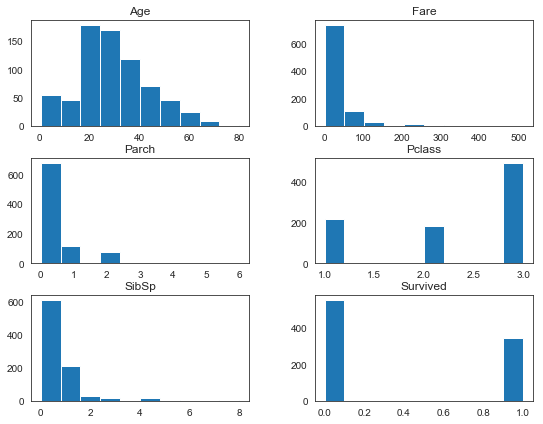

In [8]:
train.hist(bins=10,figsize=(9,7),grid=False);

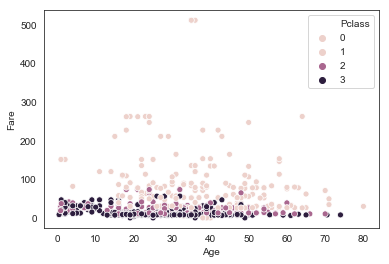

In [9]:
sns.scatterplot(x='Age', y='Fare', hue='Pclass', data=train);


## Imputing Missing Values and Transformations

---
First we need to reduce the number of names. I plan on aggigating common young and old male and female honerifics and put the rest as "Other".


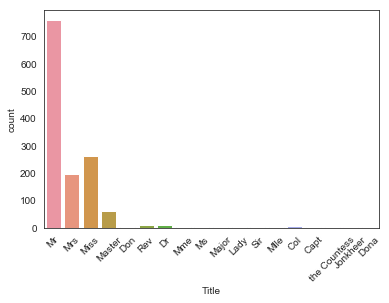

In [10]:
df['Title'] = df['Name'].apply(lambda c: c[c.index(',')+2:c.index('.')])
g = sns.countplot(df.Title)
plt.xticks(rotation=45)
plt.show()

Secondly, the missing cabin information must be addressed. Instead of creating complicated rules that would inpute it based on other factors, I just created an additional category. This should still allow differentiation based on the random forrest approach.

---

For the other categorical features, I imputed them using the mode and continous variables by using the median. 

Finally, I changed them all into a dataframe with dummies encoded and then split out the trian and test sets. 